In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio as rio
import skgstat as skg

In [5]:
cwd = "c:\\Users\\m1865\\Desktop\\DISC"
cwd_Images_Raw = cwd + "\\Sentinel-2 Images Raw"
cwd_Images_Processed = cwd + "\\Sentinel-2 Images Processed"

In [6]:
img_500 = rio.open(cwd_Images_Processed + "\\Australia\\Albedo Cumber 500m.tif")
band_500 = img_500.read(1)
band_500.shape

(51, 51)

In [7]:
# Read Albedo raster image
img_1000 = rio.open(cwd_Images_Processed + "\\Australia\\Albedo Cumber 1000m.tif")
band_1000 = img_1000.read(1)
band_1000.shape

(101, 101)

In [8]:
# Read Albedo raster image
img_1500 = rio.open(cwd_Images_Processed + "\\Australia\\Albedo Cumber 1500m.tif")
band_1500 = img_1500.read(1)
band_1500.shape

(151, 151)

In [9]:
# Read Albedo raster image
img_2000 = rio.open(cwd_Images_Processed + "\\Australia\\Albedo Cumber 3000m RE.tif")
# img_2000 = rio.open(cwd_Images_Processed + "\\Australia\\Albedo Litch 3000m.tif")
band_2000 = img_2000.read(1)
band_2000.shape

(150, 150)

In [10]:
# reshape the band arrays into one-dimensional array
band_500_reshape = band_500.reshape(-1)
band_1000_reshape = band_1000.reshape(-1)
band_1500_reshape = band_1500.reshape(-1)
band_2000_reshape = band_2000.reshape(-1)

In [11]:
# Get the coordinates n-dimensional array
list_Coordinates_500 = []
for x in range(img_500.shape[0]):
    for y in range(img_500.shape[1]):
        temp_x, temp_y = img_500.xy(x, y)
        temp_list = [temp_x, temp_y]
        list_Coordinates_500.append(temp_list)
arr_Coordinates_500 = np.array(list_Coordinates_500)
arr_Coordinates_500

array([[ 288245., 6277895.],
       [ 288255., 6277895.],
       [ 288265., 6277895.],
       ...,
       [ 288725., 6277395.],
       [ 288735., 6277395.],
       [ 288745., 6277395.]])

In [12]:
# Get the coordinates n-dimensional array
list_Coordinates_1000 = []
for x in range(img_1000.shape[0]):
    for y in range(img_1000.shape[1]):
        temp_x, temp_y = img_1000.xy(x, y)
        temp_list = [temp_x, temp_y]
        list_Coordinates_1000.append(temp_list)
arr_Coordinates_1000 = np.array(list_Coordinates_1000)
arr_Coordinates_1000

array([[ 287995., 6278145.],
       [ 288005., 6278145.],
       [ 288015., 6278145.],
       ...,
       [ 288975., 6277145.],
       [ 288985., 6277145.],
       [ 288995., 6277145.]])

In [13]:
list_Coordinates_1500 = []
for x in range(img_1500.shape[0]):
    for y in range(img_1500.shape[1]):
        temp_x, temp_y = img_1500.xy(x, y)
        temp_list = [temp_x, temp_y]
        list_Coordinates_1500.append(temp_list)
arr_Coordinates_1500 = np.array(list_Coordinates_1500)
arr_Coordinates_1500

array([[ 287745., 6278395.],
       [ 287755., 6278395.],
       [ 287765., 6278395.],
       ...,
       [ 289225., 6276895.],
       [ 289235., 6276895.],
       [ 289245., 6276895.]])

In [14]:
list_Coordinates_2000 = []
for x in range(img_2000.shape[0]):
    for y in range(img_2000.shape[1]):
        temp_x, temp_y = img_2000.xy(x, y)
        temp_list = [temp_x, temp_y]
        list_Coordinates_2000.append(temp_list)
arr_Coordinates_2000 = np.array(list_Coordinates_2000)
arr_Coordinates_2000

array([[ 287000.03333333, 6279139.96666667],
       [ 287020.1       , 6279139.96666667],
       [ 287040.16666667, 6279139.96666667],
       ...,
       [ 289949.83333333, 6276150.03333333],
       [ 289969.9       , 6276150.03333333],
       [ 289989.96666667, 6276150.03333333]])

In [15]:
# Get the maximum lag
diagonal_500 = 500 * (2 ** 0.5) / 2
bin_500 = np.arange(10,diagonal_500,30)
bin_500[-1]

340.0

In [16]:
# Get the maximum lag
diagonal_1000 = 1000 * (2 ** 0.5) / 2
bin_1000 = np.arange(10,diagonal_1000,30)
bin_1000[-1]

700.0

In [17]:
# Get the maximum lag
diagonal_1500 = 1500 * (2 ** 0.5) / 2
bin_1500 = np.arange(10,diagonal_1500,30)
bin_1500[-1]

1060.0

In [18]:
# Get the maximum lag
diagonal_2000 = 2000 * (2 ** 0.5) / 2
bin_2000 = np.arange(10,diagonal_2000,30)
bin_2000[-1]

1390.0

In [19]:
V_500 = skg.Variogram(arr_Coordinates_500, band_500_reshape, use_nugget=True, bin_func=bin_500, maxlag = bin_500[-1])
V_500.describe()

{'model': 'spherical',
 'estimator': 'matheron',
 'dist_func': 'euclidean',
 'normalized_effective_range': 102453.6972601873,
 'normalized_sill': 1.500262097886215e-06,
 'normalized_nugget': 1.616113171364931e-06,
 'effective_range': 301.33440370643325,
 'sill': 0.000834944004396344,
 'nugget': 0.0008994188447193916,
 'params': {'estimator': 'matheron',
  'model': 'spherical',
  'dist_func': 'euclidean',
  'bin_func': 'custom_bin_edges',
  'normalize': False,
  'fit_method': 'trf',
  'fit_sigma': None,
  'use_nugget': True,
  'maxlag': 340.0,
  'n_lags': 10,
  'verbose': False},
 'kwargs': {}}

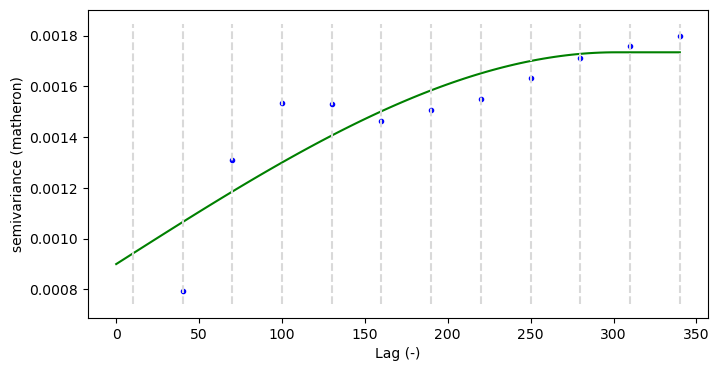

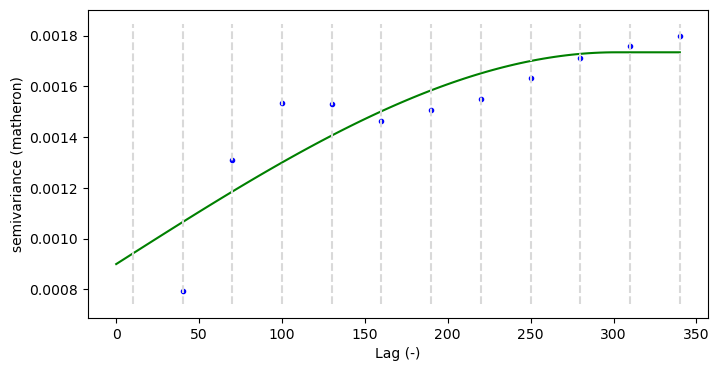

In [20]:
V_500.plot(show = False, hist = False)

In [21]:
V_1000 = skg.Variogram(arr_Coordinates_1000, band_1000_reshape, use_nugget=True, bin_func=bin_1000, maxlag = bin_1000[-1])
V_1000.describe()

{'model': 'spherical',
 'estimator': 'matheron',
 'dist_func': 'euclidean',
 'normalized_effective_range': 356662.10315672023,
 'normalized_sill': 2.093426196247984e-06,
 'normalized_nugget': 1.2911995824856262e-06,
 'effective_range': 509.51729022388605,
 'sill': 0.0011279823035637967,
 'nugget': 0.0006957256396347399,
 'params': {'estimator': 'matheron',
  'model': 'spherical',
  'dist_func': 'euclidean',
  'bin_func': 'custom_bin_edges',
  'normalize': False,
  'fit_method': 'trf',
  'fit_sigma': None,
  'use_nugget': True,
  'maxlag': 700.0,
  'n_lags': 10,
  'verbose': False},
 'kwargs': {}}

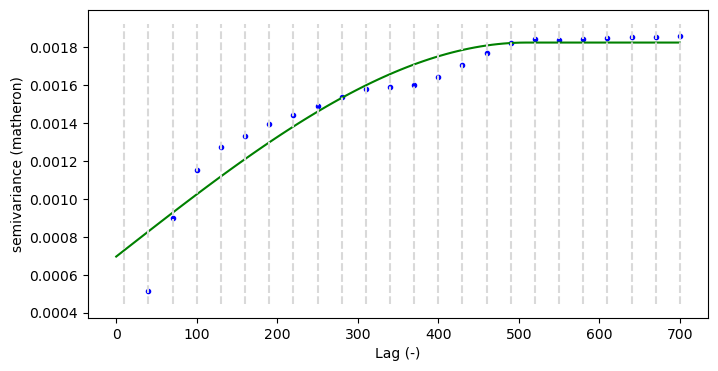

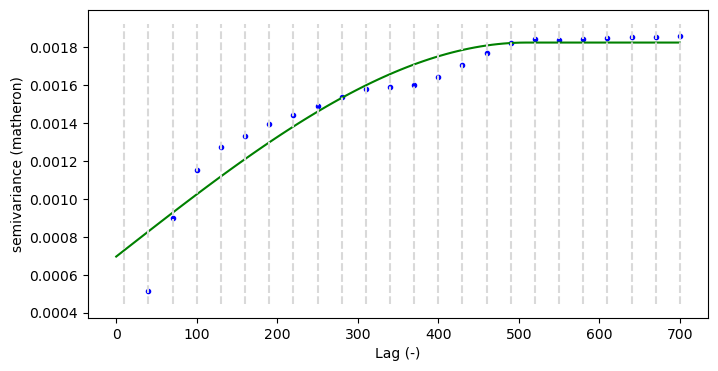

In [22]:
V_1000.plot(show = False, hist = False)

In [28]:
V_1500 = skg.Variogram(arr_Coordinates_1500, band_1500_reshape, use_nugget=True, bin_func=bin_1500, maxlag = bin_1500[-1])
V_1500.describe()

{'model': 'spherical',
 'estimator': 'matheron',
 'dist_func': 'euclidean',
 'normalized_effective_range': 690473.5778381964,
 'normalized_sill': 1.5672654078881923e-07,
 'normalized_nugget': 2.641050197863339e-07,
 'effective_range': 651.3901677718834,
 'sill': 0.00023993538139500072,
 'nugget': 0.000404322958522727,
 'params': {'estimator': 'matheron',
  'model': 'spherical',
  'dist_func': 'euclidean',
  'bin_func': 'custom_bin_edges',
  'normalize': False,
  'fit_method': 'trf',
  'fit_sigma': None,
  'use_nugget': True,
  'maxlag': 1060.0,
  'n_lags': 10,
  'verbose': False},
 'kwargs': {}}

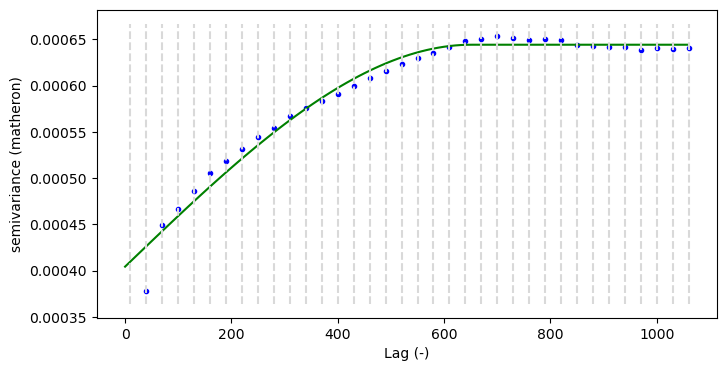

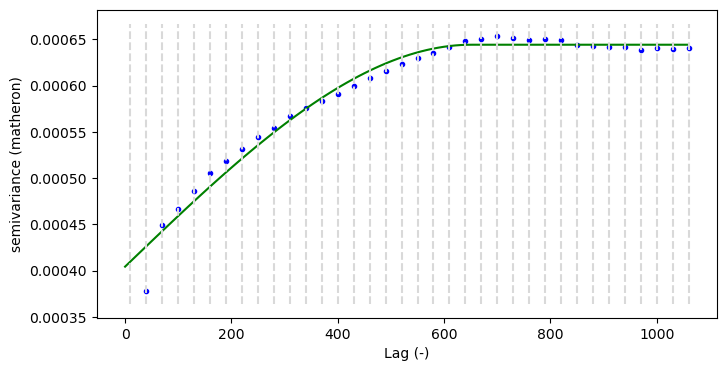

In [29]:
V_1500.plot(show = False, hist = False)

In [30]:
V_2000 = skg.Variogram(arr_Coordinates_2000, band_2000_reshape, use_nugget=True, bin_func=bin_2000, maxlag = bin_2000[-1])
V_2000.describe()

{'model': 'spherical',
 'estimator': 'matheron',
 'dist_func': 'euclidean',
 'normalized_effective_range': 1842084.3611318592,
 'normalized_sill': 8.21375724267694e-07,
 'normalized_nugget': 6.308209476145955e-07,
 'effective_range': 1325.2405475768771,
 'sill': 0.0006636794615330152,
 'nugget': 0.0005097093747320866,
 'params': {'estimator': 'matheron',
  'model': 'spherical',
  'dist_func': 'euclidean',
  'bin_func': 'custom_bin_edges',
  'normalize': False,
  'fit_method': 'trf',
  'fit_sigma': None,
  'use_nugget': True,
  'maxlag': 1390.0,
  'n_lags': 10,
  'verbose': False},
 'kwargs': {}}

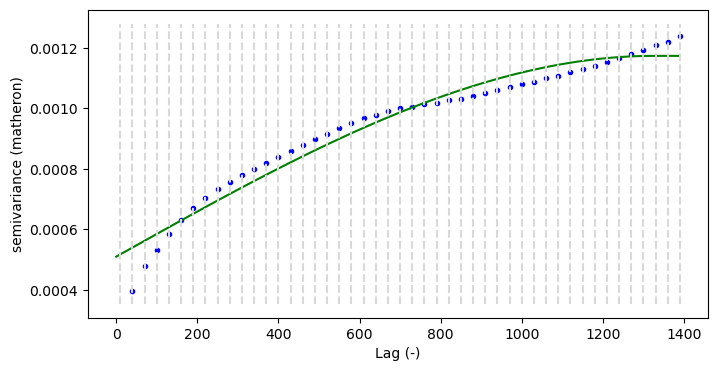

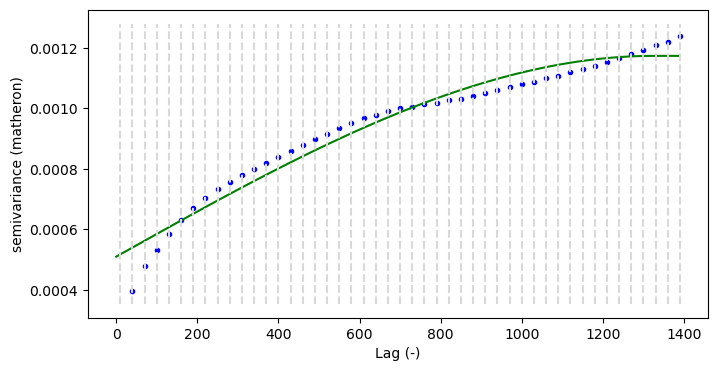

In [31]:
V_2000.plot(show = False, hist = False)